In [1]:
import sklearn
print('Hi')
print(sklearn.__version__)

Hi
0.24.2


# Modelling

In [4]:
import pandas as pd
import sklearn as sk
import numpy as np
import pickle

In [ ]:
known = 6
noise = 0
train = pd.read_csv(f"../workdir/AIS-ModelFrames/aisdk-2023-11-08-xs_2_kkn_train_{known}_0.csv")
test = pd.read_csv(f"../workdir/AIS-ModelFrames/aisdk-2023-11-08-xs_2_kkn_test_{known}_{noise}.csv")

In [5]:
test.head() 

,input_0_time,input_0_x,input_0_y,input_1_time,input_1_x,input_1_y,input_2_time,input_2_x,input_2_y,output_x,output_y
0,30.0,0.0,0.0,18.0,-6.1,24.4,10.0,-11.2,41.6,-16.1,62.8
1,22.0,0.0,0.0,12.0,-4.4,21.8,4.0,-4.4,21.8,-10.8,48.1
2,30.0,0.0,0.0,20.0,-7.3,19.1,10.0,-15.1,38.9,-22.5,57.9
3,30.0,0.0,0.0,20.0,-5.9,17.9,10.0,-11.7,34.8,-18.0,52.1
4,30.0,0.0,0.0,22.0,-5.9,14.6,12.0,-10.6,33.6,-17.5,57.0


In [7]:
train_y = train.loc[:,["output_x","output_y"]]
test_y = test.loc[:,["output_x","output_y"]]
train_x = train.drop(columns=["output_x","output_y"])
test_x = test.drop(columns=["output_x","output_y"])

In [7]:
train_x.head()
#train_y.head(100)
#print(type("input_2_x"))

,input_0_time,input_0_x,input_0_y,input_1_time,input_1_x,input_1_y,input_2_time,input_2_x,input_2_y
0,22.0,0.0,0.0,21.0,0.0,0.0,11.0,-0.1,0.3
1,20.0,0.0,0.0,10.0,0.4,0.1,1.0,0.6,0.3
2,30.0,0.0,0.0,19.0,0.0,0.5,11.0,-0.2,0.4
3,20.0,0.0,0.0,19.0,0.0,0.0,9.0,-0.4,0.0
4,30.0,0.0,0.0,21.0,-0.6,0.3,11.0,-0.6,0.4


In [8]:
df_res = test_y.copy()

df_res["output_x"] = known
df_res["output_y"] = noise

#df_res.head()

## Baseline Testing

In [9]:
import numpy as np
import pandas as pd

# dummy_prediction = test_x.loc[:,["input_2_x", "input_2_y"]]
dummy_prediction = test_x.loc[:,[f"input_{known-1}_x", f"input_{known-1}_y"]]


#df_test = test.copy()

df_res[f"bl_{known}_{noise}"] = np.sqrt((test_y["output_x"] - dummy_prediction[f"input_{known-1}_x"])**2 + (test_y["output_y"] - dummy_prediction[f"input_{known-1}_y"])**2)

df_res.head()



#df_test['sqrt'] = pd.Series((np.sqrt(("input_2_x"- "output_x")**2 + ("input_2_y"- "output_y"))**2)), index=df_test.index)
#df_test['sqrt'] = pd.Series(0, index=df_test.index)
#df_test['sqrt'] = np.sqrt((df_test["input_2_x"] - df_test["output_x"])**2 + (df_test["input_2_y"] - df_test["output_y"])**2)
#df_test['sqrt'] = np.sqrt((df_test["input_2_x"] + df_test["output_x"]) + (df_test["input_2_y"] + df_test["output_y"]))
#print(f"Anzahl Schiffe: {df_test['sqrt'].nunique()}")
#baseline = dummy_prediction.groupby("sqrt").size()
print(df_res[f"bl_{known}_{noise}"].describe())

count    320568.000000
mean         30.464561
std          25.380031
min           0.000000
25%           5.423099
50%          30.647023
75%          50.480095
max         205.212695
Name: bl_3_0, dtype: float64


## Linear Regression

Funktionierende Modelle:
https://scikit-learn.org/1.5/modules/multiclass.html#multioutput-regression

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

linearpipe = Pipeline([("scaler", StandardScaler()), ("regressor", LinearRegression())])
linearpipe.fit(train_x, train_y)

#np.sqrt(test_y, linearpipe.predict(test_x))


#df_test = test.copy()
#df = pd.DataFrame(linearpipe.predict(test_x))
#df.columns = ["lin_x", "lin_y"]
#df.head()
#df_test.head()
#df_res[f"lr_{known}_{noise}"] = np.sqrt((test_y["output_x"] - df["lin_x"])**2 + (test_y["output_y"] - df["lin_y"])**2)

#print(df_res[f"lr_{known}_{noise}"].describe())

pickle.dump(linearpipe, open(f"../workdir/AIS-TrainedModel/lin_{known}_{noise}.csv", 'wb'))

In [ ]:
#with open(f"../workdir/AIS-TrainedModel/LinReg_{known}_{noise}.csv", 'rb') as f:
model = pickle.load(open(f"../workdir/AIS-TrainedModel/LinReg_{known}_{noise}.csv", 'rb'))

#model.predict(test_x)

df = pd.DataFrame(model.predict(test_x))
df.columns = ["linC_x", "linC_y"]
df.head()
#df_test.head()
df_res[f"lrC_{known}_{noise}"] = np.sqrt((test_y["output_x"] - df["linC_x"])**2 + (test_y["output_y"] - df["linC_y"])**2)

print(df_res[f"lrC_{known}_{noise}"].describe())

count    3.205680e+05
mean     9.308489e+00
std      1.290228e+01
min      3.935662e-07
25%      1.560694e+00
50%      4.313301e+00
75%      1.189245e+01
max      1.474059e+02
Name: lrC_3_0, dtype: float64


## Neural Network

https://scikit-learn.org/dev/modules/generated/sklearn.neural_network.MLPRegressor.html

In [9]:
from sklearn.neural_network import MLPRegressor

mlppipe = Pipeline([("scaler", StandardScaler()), ("regressor", MLPRegressor((50)))])
mlppipe.fit(train_x, train_y)

#np.sqrt(test_y, mlppipe.predict(test_x))

#df_test = test.copy()
#df = pd.DataFrame(mlppipe.predict(test_x))
#df.columns = ["mlp_x", "mlp_y"]
#df.head()
#df_test.head()
#df_res[f"nn_{known}_{noise}"] = np.sqrt((test_y["output_x"] - df["mlp_x"])**2 + (test_y["output_y"] - df["mlp_y"])**2)

#print(df_res[f"nn_{known}_{noise}"].describe())

pickle.dump(mlppipe, open(f"../workdir/AIS-TrainedModel/mlp_{known}_{noise}.csv", 'wb'))

/home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## AutoSklearn   


In [13]:
from autosklearn.regression import AutoSklearnRegressor
import autosklearn.metrics
automl = AutoSklearnRegressor(
    time_left_for_this_task=120, memory_limit=100*1024, n_jobs=-1, metric=autosklearn.metrics.mean_squared_error
    )
automl.fit(train_x, train_y, dataset_name=f'known{known}')

ensemble_dict = automl.show_models()
print(ensemble_dict)




[WARNING] [2024-12-03 19:02:55,019:Client-AutoML(1):known3] Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (119.045769)
[WARNING] [2024-12-03 19:02:55,019:Client-AutoML(1):known3] Capping the per_run_time_limit to 59.0 to have time for a least 2 models in each process.
[WARNING] [2024-12-03 19:02:55,189:Client-AutoMLSMBO(1)::known3] Could not find meta-data directory /home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/autosklearn/metalearning/files/mean_squared_error_multioutput.regression_dense
[WARNING] [2024-12-03 19:02:57,496:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2024-12-03 19:03:00,931:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2024-12-03 19:03:04,062:Client-EnsembleBuilder] No runs were available to build an ensemble from
{17: {'model_id': 17, 'rank': 1, 'cost': 26.247851085609945, 'ense

In [24]:
from autosklearn.regression import AutoSklearnRegressor
import autosklearn.metrics



automl = AutoSklearnRegressor(
    time_left_for_this_task=30, memory_limit=100*1024, n_jobs=-1, metric=autosklearn.metrics.mean_squared_error,
    #hidden_layer_sizes=(10, 20, 30),  # 3 hidden layers with 10, 20, 30 nodes each
    #, hidden_layer_depth(1), num_nodes_per_layer(3)
    )
automl.fit(train_x, train_y, dataset_name=f'known{known}')

ensemble_dict = automl.show_models()
print(ensemble_dict)


[WARNING] [2024-12-03 18:56:46,815:Client-AutoML(1):known3] Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (29.006394)
[WARNING] [2024-12-03 18:56:46,815:Client-AutoML(1):known3] Capping the per_run_time_limit to 14.0 to have time for a least 2 models in each process.
[WARNING] [2024-12-03 18:56:46,937:Client-AutoMLSMBO(1)::known3] Could not find meta-data directory /home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/autosklearn/metalearning/files/mean_squared_error_multioutput.regression_dense
[WARNING] [2024-12-03 18:56:49,986:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2024-12-03 18:56:52,723:Client-EnsembleBuilder] No runs were available to build an ensemble from
{21: {'model_id': 21, 'rank': 1, 'cost': 286.34164789763815, 'ensemble_weight': 1.0, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorC

In [14]:
import numpy as np



#np.sqrt(mean_squared_error(test_y, automl.predict(test_x)))

#df_test = test.copy()
df = pd.DataFrame(automl.predict(test_x))
df.columns = ["autosk_x", "autosk_y"]
df.head()
#df_test.head()
df_res[f"as_{known}_{noise}"] = np.sqrt((test_y["output_x"] - df["autosk_x"])**2 + (test_y["output_y"] - df["autosk_y"])**2)

print(df_res[f"as_{known}_{noise}"].describe())

pickle.dump(automl, open(f"../workdir/AIS-TrainedModel/autosk_{known}_{noise}.csv", 'wb'))

count    320568.000000
mean          6.942214
std           8.795190
min           0.000854
25%           1.888821
50%           4.286965
75%           8.689399
max         203.463877
Name: as_3_0, dtype: float64


In [15]:
df_res.head()
#df_res.to_csv(f"../workdir/AIS-ModelFrames/aisdk-2023-11-08-xs_2_kkn_res_{known}_{noise}.csv", index=False)

,output_x,output_y,bl_3_0,lr_3_0,lrC_3_0,nn_3_0,as_3_0
0,3,0,21.758906,0.731286,0.731286,1.462513,3.771935
1,3,0,27.067508,13.418518,13.418518,14.435750,11.726620
2,3,0,20.390194,0.756131,0.756131,0.571709,3.810228
3,3,0,18.411410,1.013412,1.013412,0.948399,1.082789
4,3,0,24.396106,8.294446,8.294446,2.868002,52.813801


## Create Modells

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

from sklearn.neural_network import MLPRegressor

from autosklearn.regression import AutoSklearnRegressor
import autosklearn.metrics

from pathlib import Path

import time # localtime to unix time

noise = 0
folderinput = "../workdir/AIS-ModelFrames/"
folderoutput = "../workdir/AIS-TrainedModel/"
#filename = f"aisdk-2023-11-08-xs_2_kkn"

filename = "aisdk-2023-11-08_1_kkn"
#filename = "aisdk-2023-11-08-6xs_2_kkn"
# filename = "aisdk-2023-11-08-s_2_kkn"
#filename = 'aisdk-2023-11-08-xs_3_kkn'
#filename = "aisdk-2023-11-08_2_kkn"

for known in range(12, 2, -1):

    train = pd.read_csv(folderinput+filename+"_train_"+str(known)+"_0.csv")
    test = pd.read_csv(folderinput+filename+"_test_"+str(known)+"_0.csv")

    train_y = train.loc[:,["output_x","output_y"]]
    test_y = test.loc[:,["output_x","output_y"]]
    train_x = train.drop(columns=["output_x","output_y"])
    test_x = test.drop(columns=["output_x","output_y"])

    test = []
    train = []

    df_res = test_y.copy()

    df_res.rename(columns={"output_x": "known_"+str(known)+"_0", "output_y": "noise_"+str(known)+"_0"}, inplace=True)

    df_res[f"known_"+str(known)+"_0"] = known
    df_res[f"noise_"+str(known)+"_0"] = noise
    print("init "+str(known)+" "+str(noise) + " " + time.ctime(time.time())) 

    # linear regression

    path = Path(folderoutput+filename+"_lin_"+str(known)+"_0.csv")
    if not path.exists():  

        linearpipe = Pipeline([("scaler", StandardScaler()), ("regressor", LinearRegression())])
        linearpipe.fit(train_x, train_y)
        pickle.dump(linearpipe, open(path, 'wb'))
        linearpipe = []
    print("lin "+str(known)+" "+str(noise) + " " + time.ctime(time.time())) 

    # Multi-layer Perceptron

    path = Path(folderoutput+filename+"_mlp_"+str(known)+"_0.csv")
    if not path.exists(): 

        mlppipe = Pipeline([("scaler", StandardScaler()), ("regressor", MLPRegressor((50)))])
        mlppipe.fit(train_x, train_y)
        pickle.dump(mlppipe, open(path, 'wb'))
        mlppipe = []
    print("mlp "+str(known)+" "+str(noise) + " " + time.ctime(time.time())) 

    # autosklearn

    runduraction = 3600*5#2
    memory = 10*1024
    path = Path(folderoutput+filename+"_autosk_"+str(known)+"_0_"+str(runduraction)+"_"+str(memory)+".csv")

    if not path.exists(): 
        automl = AutoSklearnRegressor(
            time_left_for_this_task=runduraction, memory_limit=memory, n_jobs=-1, metric=autosklearn.metrics.mean_squared_error
            #time_left_for_this_task=3600, memory_limit=80*1024, n_jobs=-1, metric=autosklearn.metrics.mean_squared_error
            )
        automl.fit(train_x, train_y, dataset_name=f'known{known}')

        ensemble_dict = automl.show_models()
        print(ensemble_dict)
        pickle.dump(automl, open(path, 'wb'))
        automl = []


     
    print("sklearn "+str(known)+" "+str(noise) + " " + time.ctime(time.time()))   

init 12 0 Fri Jan 24 11:24:55 2025
lin 12 0 Fri Jan 24 11:24:55 2025
mlp 12 0 Fri Jan 24 11:24:55 2025
[WARNING] [2025-01-24 11:25:09,549:Client-AutoML(1):known12] Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (17995.410707)
[WARNING] [2025-01-24 11:25:09,549:Client-AutoML(1):known12] Capping the per_run_time_limit to 8997.0 to have time for a least 2 models in each process.
[WARNING] [2025-01-24 11:25:09,984:Client-AutoMLSMBO(1)::known12] Could not find meta-data directory /home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/autosklearn/metalearning/files/mean_squared_error_multioutput.regression_dense
[WARNING] [2025-01-24 11:25:21,932:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-24 11:25:26,357:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-24 11:25:34,648:Client-EnsembleBuilder] No ru

/home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


mlp 11 0 Fri Jan 24 16:53:38 2025
[WARNING] [2025-01-24 16:53:49,985:Client-AutoML(1):known11] Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (17996.094015)
[WARNING] [2025-01-24 16:53:49,985:Client-AutoML(1):known11] Capping the per_run_time_limit to 8998.0 to have time for a least 2 models in each process.
[WARNING] [2025-01-24 16:53:50,547:Client-AutoMLSMBO(1)::known11] Could not find meta-data directory /home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/autosklearn/metalearning/files/mean_squared_error_multioutput.regression_dense
[WARNING] [2025-01-24 16:54:01,296:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-24 16:54:05,356:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-24 16:54:18,253:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-24 16:

/home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


mlp 10 0 Fri Jan 24 22:22:06 2025
[WARNING] [2025-01-24 22:23:32,328:Client-AutoML(1):known10] Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (17996.297691)
[WARNING] [2025-01-24 22:23:32,328:Client-AutoML(1):known10] Capping the per_run_time_limit to 8998.0 to have time for a least 2 models in each process.
[WARNING] [2025-01-24 22:23:32,857:Client-AutoMLSMBO(1)::known10] Could not find meta-data directory /home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/autosklearn/metalearning/files/mean_squared_error_multioutput.regression_dense
[WARNING] [2025-01-24 22:23:43,552:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-24 22:23:47,425:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-24 22:23:53,711:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-24 22:

/home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


mlp 9 0 Sat Jan 25 03:52:04 2025
[WARNING] [2025-01-25 03:52:41,787:Client-AutoML(1):known9] Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (17996.443505)
[WARNING] [2025-01-25 03:52:41,787:Client-AutoML(1):known9] Capping the per_run_time_limit to 8998.0 to have time for a least 2 models in each process.
[WARNING] [2025-01-25 03:52:42,103:Client-AutoMLSMBO(1)::known9] Could not find meta-data directory /home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/autosklearn/metalearning/files/mean_squared_error_multioutput.regression_dense
[WARNING] [2025-01-25 03:53:00,857:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-25 03:53:04,281:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-25 03:53:08,560:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-25 03:53:1

/home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


mlp 8 0 Sat Jan 25 09:07:31 2025
[WARNING] [2025-01-25 09:08:40,538:Client-AutoML(1):known8] Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (17996.711838)
[WARNING] [2025-01-25 09:08:40,538:Client-AutoML(1):known8] Capping the per_run_time_limit to 8998.0 to have time for a least 2 models in each process.
[WARNING] [2025-01-25 09:08:40,864:Client-AutoMLSMBO(1)::known8] Could not find meta-data directory /home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/autosklearn/metalearning/files/mean_squared_error_multioutput.regression_dense
[WARNING] [2025-01-25 09:08:49,387:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-25 09:08:54,081:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-25 09:09:00,249:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-25 09:09:0

/home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


mlp 7 0 Sat Jan 25 14:23:51 2025
[WARNING] [2025-01-25 14:25:45,916:Client-AutoML(1):known7] Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (17996.948605)
[WARNING] [2025-01-25 14:25:45,916:Client-AutoML(1):known7] Capping the per_run_time_limit to 8998.0 to have time for a least 2 models in each process.
[WARNING] [2025-01-25 14:25:46,140:Client-AutoMLSMBO(1)::known7] Could not find meta-data directory /home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/autosklearn/metalearning/files/mean_squared_error_multioutput.regression_dense
[WARNING] [2025-01-25 14:25:54,308:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-25 14:25:58,889:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-25 14:26:20,522:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-25 14:26:2

/home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


mlp 6 0 Sat Jan 25 19:39:44 2025
[WARNING] [2025-01-25 19:40:12,452:Client-AutoML(1):known6] Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (17997.282395)
[WARNING] [2025-01-25 19:40:12,452:Client-AutoML(1):known6] Capping the per_run_time_limit to 8998.0 to have time for a least 2 models in each process.
[WARNING] [2025-01-25 19:40:12,719:Client-AutoMLSMBO(1)::known6] Could not find meta-data directory /home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/autosklearn/metalearning/files/mean_squared_error_multioutput.regression_dense
[WARNING] [2025-01-25 19:40:20,394:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-25 19:40:24,304:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-25 19:40:29,211:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-25 19:40:3

/home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


mlp 5 0 Sun Jan 26 00:54:05 2025
[WARNING] [2025-01-26 00:54:16,578:Client-AutoML(1):known5] Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (17997.402700)
[WARNING] [2025-01-26 00:54:16,578:Client-AutoML(1):known5] Capping the per_run_time_limit to 8998.0 to have time for a least 2 models in each process.
[WARNING] [2025-01-26 00:54:16,787:Client-AutoMLSMBO(1)::known5] Could not find meta-data directory /home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/autosklearn/metalearning/files/mean_squared_error_multioutput.regression_dense
[WARNING] [2025-01-26 00:54:23,261:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-26 00:54:27,965:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-26 00:54:33,745:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-26 00:54:4

/home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


mlp 4 0 Sun Jan 26 06:07:24 2025
[WARNING] [2025-01-26 06:07:41,531:Client-AutoML(1):known4] Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (17997.684838)
[WARNING] [2025-01-26 06:07:41,531:Client-AutoML(1):known4] Capping the per_run_time_limit to 8998.0 to have time for a least 2 models in each process.
[WARNING] [2025-01-26 06:07:41,741:Client-AutoMLSMBO(1)::known4] Could not find meta-data directory /home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/autosklearn/metalearning/files/mean_squared_error_multioutput.regression_dense
[WARNING] [2025-01-26 06:07:47,431:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-26 06:07:51,571:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-26 06:07:55,402:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-26 06:08:0

/home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


mlp 3 0 Sun Jan 26 11:20:13 2025
[WARNING] [2025-01-26 11:20:26,577:Client-AutoML(1):known3] Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (17997.949577)
[WARNING] [2025-01-26 11:20:26,577:Client-AutoML(1):known3] Capping the per_run_time_limit to 8998.0 to have time for a least 2 models in each process.
[WARNING] [2025-01-26 11:20:26,761:Client-AutoMLSMBO(1)::known3] Could not find meta-data directory /home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/autosklearn/metalearning/files/mean_squared_error_multioutput.regression_dense
[WARNING] [2025-01-26 11:20:32,293:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-26 11:20:35,339:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-26 11:20:39,137:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-26 11:20:4

## Check Modells under noise

In [3]:
import numpy as np
import pandas as pd

folder = "../workdir/AIS-ModelFrames/"
filename = f"aisdk-2023-11-08_1_kkn"
#filename = f"aisdk-2023-11-08-xs_2_kkn"
#filename = "aisdk-2023-11-08-s_2_kkn"
#filename = 'aisdk-2023-11-08-xs_3_kkn'
#filename = "aisdk-2023-11-08-6xs_2_kkn"

for known in range(3, 13, 1):
    for noise in range(0, 11, 5):
        test = pd.read_csv(f"{folder}{filename}_test_{known}_{noise}.csv")

        test_y = test.loc[:,["output_x","output_y"]]
        test_x = test.drop(columns=["output_x","output_y"])

        #if known == 12 and noise == 0:  
        #    df_res = test_y.copy()

        #    df_res.rename(columns={"output_x": f"known_{known}_0", "output_y": f"noise_{known}_0"}, inplace=True)

        #    df_res[f"known_{known}w0"] = known
        #    df_res[f"noise_{known}w0"] = noise
        #else:
        #    df_res[f"known_{known}_{noise}"] = known
        #    df_res[f"noise_{known}_{noise}"] = noise


        #df_bl = pd.DataFrame()
        #df_lr = pd.DataFrame()
        #df_ml = pd.DataFrame()
        #df_as = pd.DataFrame()
        #df_tmp = pd.DataFrame()

        # Baseline



        dummy_prediction = test_x.loc[:,[f"input_{known-1}_x", f"input_{known-1}_y"]]
        df_res[f"bl_{known}w{noise}"] = np.sqrt((test_y["output_x"] - dummy_prediction[f"input_{known-1}_x"])**2 + (test_y["output_y"] - dummy_prediction[f"input_{known-1}_y"])**2)
        #df_bl[f"bl_{known}_{noise}"] = np.sqrt((test_y["output_x"] - dummy_prediction[f"input_{known-1}_x"])**2 + (test_y["output_y"] - dummy_prediction[f"input_{known-1}_y"])**2)
        #print(df_res[f"bl_{known}_{noise}"].describe())

        # Linear Regression


        linReg = pickle.load(open(f"../workdir/AIS-TrainedModel/{filename}_lin_{known}_0.csv", 'rb'))
        df = pd.DataFrame(linReg.predict(test_x))
        df.columns = [f"lin_x_{known}_{noise}", f"lin_y_{known}_{noise}"]
        df_res[f"lr_{known}w{noise}"] = np.sqrt((test_y["output_x"] - df[f"lin_x_{known}_{noise}"])**2 + (test_y["output_y"] - df[f"lin_y_{known}_{noise}"])**2)
        #df_lr[f"lr_{known}_{noise}"] = np.sqrt((test_y["output_x"] - df[f"lin_x_{known}_{noise}"])**2 + (test_y["output_y"] - df[f"lin_y_{known}_{noise}"])**2)


        #print(df_res[f"lr_{known}_{noise}"].describe())

        # Neural Network

        mlppipe = pickle.load(open(f"../workdir/AIS-TrainedModel/{filename}_mlp_{known}_0.csv", 'rb'))
        df = pd.DataFrame(mlppipe.predict(test_x))
        df.columns = [f"mlp_x_{known}_{noise}", f"mlp_y_{known}_{noise}"]
        df_res[f"ml_{known}w{noise}"] = np.sqrt((test_y["output_x"] - df[f"mlp_x_{known}_{noise}"])**2 + (test_y["output_y"] - df[f"mlp_y_{known}_{noise}"])**2)
        #df_ml[f"ml_{known}_{noise}"] = np.sqrt((test_y["output_x"] - df[f"mlp_x_{known}_{noise}"])**2 + (test_y["output_y"] - df[f"mlp_y_{known}_{noise}"])**2)
        #print(df_res[f"ml_{known}_{noise}"].describe())

        # # AutoSklearn
        
        automl = pickle.load(open(f"../workdir/AIS-TrainedModel/{filename}_autosk_{known}_0_18000_10240.csv", 'rb')) # 18000 10240 # 14400_6144
        df = pd.DataFrame(automl.predict(test_x))
        df.columns = [f"autosk_x_{known}_{noise}", f"autosk_y_{known}_{noise}"]
        df_res[f"as_{known}w{noise}"] = np.sqrt((test_y["output_x"] - df[f"autosk_x_{known}_{noise}"])**2 + (test_y["output_y"] - df[f"autosk_y_{known}_{noise}"])**2)
        # #print(df_res[f"as_{known}_{noise}"].describe())

        df_tmp = df_res.copy()
        df_res = []
        df_res = df_tmp.copy()
        df_tmp = []

        #df_tmp = df_bl + df_lr + df_ml + df_as


        #df_res.assign(**df_tmp)

        df_tmp = df_res.copy()
        df_res = df_tmp.copy()

        print(f"Known: {known}, Noise: {noise}")   
        

        
        
df_res.to_csv(f"../workdir/AIS-TrainedModel/{filename}_result_18000_10240.csv", index=False)
df_res.head(4)

Known: 3, Noise: 0
Known: 3, Noise: 5
Known: 3, Noise: 10
Known: 4, Noise: 0
Known: 4, Noise: 5
Known: 4, Noise: 10
Known: 5, Noise: 0
Known: 5, Noise: 5
Known: 5, Noise: 10
Known: 6, Noise: 0
Known: 6, Noise: 5
Known: 6, Noise: 10
Known: 7, Noise: 0
Known: 7, Noise: 5
Known: 7, Noise: 10
Known: 8, Noise: 0
Known: 8, Noise: 5
Known: 8, Noise: 10
Known: 9, Noise: 0
Known: 9, Noise: 5
Known: 9, Noise: 10
Known: 10, Noise: 0
Known: 10, Noise: 5
Known: 10, Noise: 10
Known: 11, Noise: 0
Known: 11, Noise: 5
Known: 11, Noise: 10
Known: 12, Noise: 0
Known: 12, Noise: 5
Known: 12, Noise: 10


,known_3_0,noise_3_0,bl_3w0,lr_3w0,ml_3w0,as_3w0,bl_3w5,lr_3w5,ml_3w5,as_3w5,...,ml_12w0,as_12w0,bl_12w5,lr_12w5,ml_12w5,as_12w5,bl_12w10,lr_12w10,ml_12w10,as_12w10
0,3,0,57.472863,10.140397,0.763702,2.222782,61.811366,17.545444,8.268143,12.449421,...,0.735245,10.088977,9.830894,10.521388,11.097213,10.426805,2.271099,17.938708,17.271217,30.833876
1,3,0,43.796119,41.747681,6.726233,6.545459,43.533252,39.969210,5.161478,6.205713,...,2.131380,10.369497,8.190563,14.116897,7.758233,3.328687,17.641131,10.797802,5.225336,13.942684
2,3,0,13.619471,1.655019,1.581207,0.935977,14.102834,2.413462,1.627959,1.062300,...,4.617921,8.597274,24.761415,6.543393,5.321836,5.777006,45.420167,19.468775,28.649034,19.515615
3,3,0,55.693806,34.990134,9.112156,5.497997,54.790430,36.701537,15.937116,15.933388,...,4.760408,12.912032,37.637027,2.737848,10.117210,2.153534,38.770557,19.232818,20.951631,25.858540


In [11]:
df_res.head()

,known_3_0,noise_3_0,bl_3_0,lr_3_0,ml_3_0,known_3_5,noise_3_5,bl_3_5,lr_3_5,ml_3_5,...,known_12_5,noise_12_5,bl_12_5,lr_12_5,ml_12_5,known_12_10,noise_12_10,bl_12_10,lr_12_10,ml_12_10
0,3,0,26.394128,24.253028,16.651340,3,5,27.858544,22.582815,16.303150,...,12,5,22.944858,3.778703,29.034530,12,10,18.567347,16.430746,30.786453
1,3,0,29.757184,7.056417,7.658877,3,5,33.150878,15.799069,19.804639,...,12,5,24.044755,7.228658,18.741644,12,10,37.382846,8.609529,14.898848
2,3,0,26.705243,4.495020,4.359024,3,5,26.755065,9.731364,12.925182,...,12,5,16.419224,9.246702,39.100139,12,10,23.981999,5.513060,33.163941
3,3,0,24.423759,3.344096,4.903927,3,5,20.627468,4.169254,7.412577,...,12,5,20.340825,11.208239,10.857208,12,10,19.873226,16.083098,1.123724
4,3,0,21.576144,0.518894,4.126247,3,5,26.540059,5.730811,12.526975,...,12,5,24.281087,2.620331,31.476201,12,10,3.955822,21.713458,30.372439


## Analysis

In [5]:
import pandas as pd

#folder = "../workdir/AIS-ModelFrames/"
#filename = f"aisdk-2023-11-08-xs_2_kkn"
filename = f"aisdk-2023-11-08_1_kkn"
#filename = f"aisdk-2023-11-08-s_2_kkn"

df_res = pd.read_csv(f"../workdir/AIS-TrainedModel/{filename}_result_18000_10240.csv")

df_res.head(4)



for known in range(3, 13, 1):
    for noise in range(0, 11, 5):
        for model in ["bl", "lr", "ml", "as"]:
            print(f"{model}_{known}w{noise}")
            print(df_res[f"{model}_{known}w{noise}"].describe())

bl_3w0
count    1.112344e+06
mean     2.909283e+01
std      2.580962e+01
min      0.000000e+00
25%      4.638965e+00
50%      2.269097e+01
75%      4.984155e+01
max      2.999323e+02
Name: bl_3w0, dtype: float64
lr_3w0
count    1.112344e+06
mean     8.837056e+00
std      1.310551e+01
min      7.363258e-04
25%      1.428050e+00
50%      3.766015e+00
75%      1.011780e+01
max      2.624741e+02
Name: lr_3w0, dtype: float64
ml_3w0
count    1.112344e+06
mean     3.698418e+00
std      4.892294e+00
min      3.548020e-04
25%      1.080575e+00
50%      2.188350e+00
75%      4.696698e+00
max      1.460685e+02
Name: ml_3w0, dtype: float64
as_3w0
count    1.112344e+06
mean     4.179343e+00
std      5.654623e+00
min      1.177057e-03
25%      1.175206e+00
50%      2.509872e+00
75%      5.210507e+00
max      1.987954e+02
Name: as_3w0, dtype: float64
bl_3w5
count    1.112344e+06
mean     3.073298e+01
std      2.486576e+01
min      3.219377e-03
25%      8.615625e+00
50%      2.393974e+01
75%      5.01

## Visualisation

In [ ]:
import pandas as pd

#folder = "../workdir/AIS-ModelFrames/"
#filename = f"aisdk-2023-11-08-xs_2_kkn"
filename = f"aisdk-2023-11-08_2_kkn"

df_res = pd.read_csv(f"../workdir/AIS-TrainedModel/{filename}_result.csv")

for known in range(3, 13, 3):
    for noise in range(0, 11, 5):
        df_res = df_res.drop(columns=[f"known_{known}_{noise}",f"noise_{known}_{noise}"])


df_res = df_res.filter(regex='bl|as')
df_res = df_res.drop(columns=['as_12_0'])
df_res = df_res.drop(columns=['as_12_5'])
df_res = df_res.drop(columns=['as_12_10'])
df_res.head()


# train_y = train.loc[:,["output_x","output_y"]]
# test_y = test.loc[:,["output_x","output_y"]]
# train_x = train.drop(columns=["output_x","output_y"])
# test_x = test.drop(columns=["output_x","output_y"])

,bl_3_0,as_3_0,bl_3_5,as_3_5,bl_3_10,as_3_10,bl_6_0,as_6_0,bl_6_5,as_6_5,...,as_6_10,bl_9_0,as_9_0,bl_9_5,as_9_5,bl_9_10,as_9_10,bl_12_0,bl_12_5,bl_12_10
0,21.758906,3.771935,15.854942,13.144366,38.400480,24.407081,27.067508,5.015769,20.164045,7.194657,...,15.953658,27.067508,12.714111,42.132852,25.788101,37.212619,24.373302,20.390194,20.157151,13.887946
1,27.067508,11.726620,26.729935,20.029172,22.487713,20.914378,20.390194,3.007513,19.558637,13.997862,...,24.451824,20.390194,6.284894,18.082513,6.664674,33.418382,28.177275,18.411410,22.726005,37.864443
2,20.390194,3.810228,24.724901,17.210790,22.590118,29.359960,18.411410,1.222630,18.293856,5.972199,...,12.334095,18.411410,2.153547,17.989848,8.423428,24.110494,27.956003,24.396106,30.291721,28.979272
3,18.411410,1.082789,17.751914,94.138317,13.232531,5.509848,24.396106,4.415781,22.340765,3.000385,...,2.514632,24.396106,4.470745,25.269094,4.855460,22.049441,3.492237,25.031980,32.924392,51.155298
4,24.396106,52.813801,27.183212,16.184165,26.882243,8.547297,25.031980,13.486272,26.066387,9.830770,...,12.354753,25.031980,12.131318,27.199979,27.861780,27.688140,22.616031,16.096273,15.706116,34.300131


<function matplotlib.pyplot.show(close=None, block=None)>

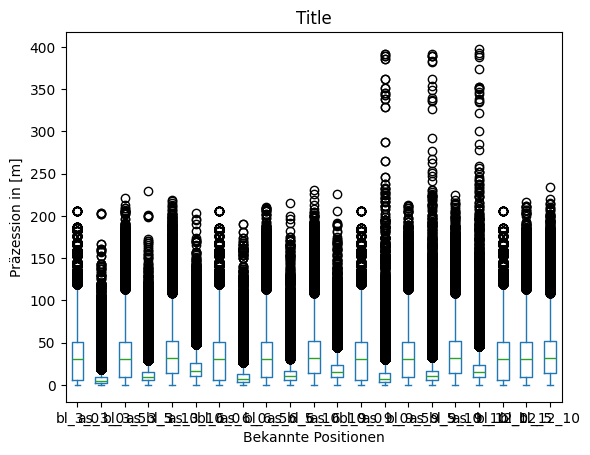

In [ ]:
from matplotlib import pyplot as plt

noise = 0
known = 3

# x_values = df_res[f"known_{known}_0"]
# y_values = df_res[f"bl_{known}_{noise}"]

# for known in range(3, 13, 3):
#     for noise in range(0, 11, 5):
#         df_res = df_res.copy

#         3

# plt.scatter(x_values, y_values)

df_res.plot(kind='box')
plt.title('Title')

plt.xlabel('Bekannte Positionen')
plt.ylabel('Präzession in [m]')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

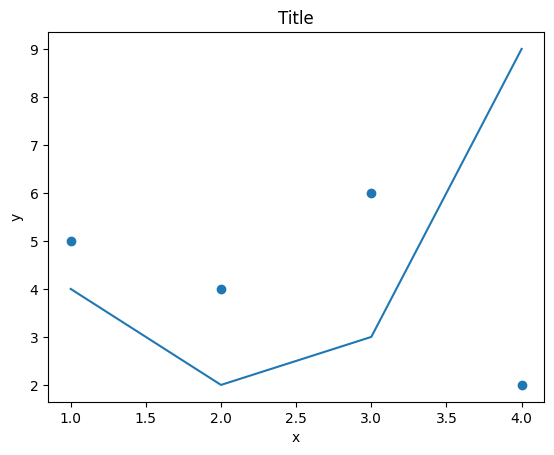

In [9]:
from matplotlib import pyplot as plt


x_values = [1, 2, 3 ,4]
y_values = [5, 4, 6, 2]

plt.scatter(x_values, y_values)

other_x_values = [1, 2, 3, 4]
other_y_values = [4, 2, 3, 9]

plt.plot(other_x_values, other_y_values)

plt.title('Title')

plt.xlabel('x')
plt.ylabel('y')

plt.show